# STA130 TUT 06 (Oct11)<br><br>🤔❓ <u>"Single Sample" Hypothesis Testing</u><br><br>Yes, the same one, with exactly the same title as last time</sub>

## ♻️ 📚 ~~Review  / Questions~~ [5 minutes]

## <u>There is NO formal review this time:</u><br><sub>Just Some Reminder Announcements</sub>

1. Prof. Scott did a BIG review as part of his Monday Lecture
2. TUT this week covers the material he didn't get to on Monday
3. The **lecture notebook** links you to Review that YOU should do regarding **Week 03 Homework Question 04** and how you MUST approach working with ChatBots

    1. [They don't reason](https://chatgpt.com/share/66fd24f3-3a00-8007-a67b-e389bb4bb940)
    2. [They can argue against reason](https://chatgpt.com/share/66fd2ea8-0dd8-8007-bb44-41e63de657be)
    3. You HAVE to WORK with them to use them as a tool; and, as we move forward in the course, [*Please Consider Using* the STA130 Custom NotebookLM ChatBot](https://github.com/pointOfive/stat130chat130/wiki) which will be much more "STA130 aware" with its answers and thinking (even though it, like all current "vanilla" ChatBots still cannot offer human level reasoning)
        

In [ ]:
YouTubeVideo('IM4wwDFUmXE', width=800, height=500)

NameError: name 'YouTubeVideo' is not defined

### It takes one minute to make the STA130 Custom NotebookLM ChatBot

For more discussion about this please see https://piazza.com/class/m0584bs9t4thi/post/87_f1

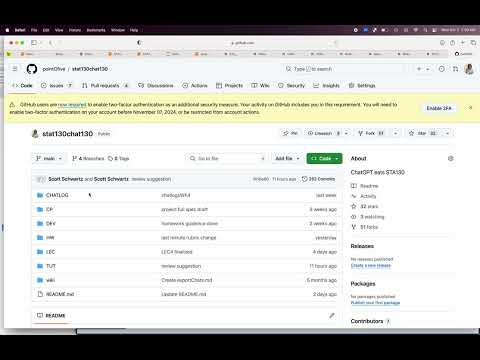

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('P8OgTEmJTeU', width=800, height=500)

## 🚧 🏗️ Demo I [25 minutes]<br>(this just picks up right from the material that we didn't get to in lecture)<br>(it's the exact material that was in the lecture notebook)

### Let's consider Week 04 HWq8 again

In [ ]:
import pandas as pd

patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

patient_data['HealthScoreChange'] = patient_data.FinalHealthScore-patient_data.InitialHealthScore

patient_data

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,HealthScoreChange
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


### Sampling Distribution of a statistic <br>*under the null hypothesis*


In [ ]:
# We're going to ask a slightly different question

patient_data['Improved'] = patient_data['HealthScoreChange']>0
patient_data

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,HealthScoreChange,Improved
0,1,45,M,84,86,2,True
1,2,34,F,78,86,8,True
2,3,29,M,83,80,-3,False
3,4,52,F,81,86,5,True
4,5,37,M,81,84,3,True
5,6,41,F,80,86,6,True
6,7,33,M,79,86,7,True
7,8,48,F,85,82,-3,False
8,9,26,M,76,83,7,True
9,10,39,F,83,84,1,True


### Let's transition our Null Hypothesis to set it up in a slightly different way

$$\begin{align*}
H_0 &{}: \mu_{\textrm{vaccine}}=\mu_{\textrm{no vaccine}}\\
&{} \;\;\;\textrm{There is no difference }\textbf{on average}\textrm{ do to the vaccine} \textbf{ is 50%}\\\\
H_0 &{}: \textrm{The vaccine has no effect }\textbf{(on average)}\textrm{ on patient health}\\
H_0 &{}: \textrm{The chance the vaccine improves patient health} \textbf{ is 50%}\\\\
H_0  &{}: p=0.5 \quad \textrm{instead of the equivalent} \\
&{} \quad\quad\quad\quad\;\; H_0: \textrm{The chance the vaccine improves patient health} \textbf{ is 50%}
\end{align*}$$

In [ ]:
population_parameter_value_under_H0 = 0.5

observed_statistic = (patient_data.HealthScoreChange>0).mean()

print('The p=0.5 Null Hypothesis of "no effect" on average')
print('but an observed statistic of', observed_statistic, "of the sample show increased health")

The p=0.5 Null Hypothesis of "no effect" on average
but an observed statistic of 0.8 of the sample show increased health


### What is ACTULLY happening and being done in the code below?<br><sub>What is being SYNTHETICALLY SIMULATED??</sub>

In [ ]:
import numpy as np

# np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000  # experiment with this... what does this do?
n_size = len(patient_data)  # 10
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# generate "random improvement" proportions assuming H0 (vaccine has no average effect) is true
# meaning that the "before and after" differences are positive or negative at "random"
for i in range(number_of_simulations):

    # why is this equivalent to the suggested idea above?
    random_improvement = np.random.choice([0,1], size=n_size, replace=True)  # <<< `replace=True` ^^^

    # why is .mean() a proportion?
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()
    # why is this the statistic we're interested in? Hint: next section...

In [ ]:
# Calculate the p-value
# How many bootstrapped statistics generated under H0
# are "as or more extreme" than the observed statistic
# (relative to the hypothesized population parameter)?

observed_statistic = (patient_data.HealthScoreChange>0).mean()
simulated_statistics = IncreaseProportionSimulations_underH0random

# Be careful with "as or more extreme" as it's symmetric!
SimStats_as_or_more_extreme_than_ObsStat = \
    abs(simulated_statistics - population_parameter_value_under_H0) >= \
    abs(observed_statistic - population_parameter_value_under_H0)

p_value = (SimStats_as_or_more_extreme_than_ObsStat).sum() / number_of_simulations
print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under HO)\n",
      'that are "as or more extreme" than the observed statistic: ',
      SimStats_as_or_more_extreme_than_ObsStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")

Number of Simulations: 10000

Number of simulated statistics (under HO)
that are "as or more extreme" than the observed statistic: 654

p-value
(= simulations "as or more extreme" / total simulations): 0.0654


### A p-value is the the probability that a statistic is as or more extreme than the observed statistic if the null hypothesis is true

In [ ]:
import plotly.figure_factory as ff
import plotly.graph_objs as go

# figure for demonstration only: code details not of primary concern

hist_data = [IncreaseProportionSimulations_underH0random+np.random.uniform(-0.05,0.05,size=len(IncreaseProportionSimulations_underH0random))]
group_labels = ['SYNTHETICALL<br>SIMULATED<br>Sampling<br>Distribution<br>of the<br>Sample<br>Mean<br><br>assuming<br>that the<br>H0 null<br>hypothesis<br>IS TRUE']
fig = ff.create_distplot(hist_data, group_labels, curve_type='normal',
                         show_hist=True, show_rug=False, bin_size=0.1)
pv_y = 2.5
pv_y_ = .25
fig.add_shape(type="line", x0=observed_statistic, y0=0,
              x1=observed_statistic, y1=pv_y,
              line=dict(color="Green", width=4), name="Observed Statistic")
fig.add_trace(go.Scatter(x=[observed_statistic], y=[pv_y+pv_y_],
                         text=["Observed<br>Statistic<br>^"], mode="text", showlegend=False))
# "as or more extreme" also include the "symmetric" observed statistic...
symmetric_statistic = population_parameter_value_under_H0 -\
                      abs(observed_statistic-population_parameter_value_under_H0)
fig.add_shape(type="line", x0=symmetric_statistic, y0=0,
              x1=symmetric_statistic, y1=pv_y,
              line=dict(color="Green", width=4), name="Observed Statistic")
fig.add_trace(go.Scatter(x=[symmetric_statistic], y=[pv_y+pv_y_],
                         text=['"Symmetric" Observed Statistic<br>addressing for "as or more extreme"<br>^'], mode="text", showlegend=False))

# Add a transparent rectangle for the lower extreme region
fig.add_shape(type="rect", x0=-0.25, y0=0, x1=symmetric_statistic, y1=pv_y,
              fillcolor="LightCoral", opacity=0.5, line_width=0)
# Add a transparent rectangle for the upper extreme region
fig.add_shape(type="rect", x0=observed_statistic, y0=0, x1=1.25, y1=pv_y,
              fillcolor="LightCoral", opacity=0.5, line_width=0)

# Update layout
fig.update_layout(
    title="SYNTHETICALL SIMULATED Sampling Distribution<br>under H0 with p-value regions",
    xaxis_title="Mean Health Score Change", yaxis_title="Density", yaxis=dict(range=[0, pv_y+2*pv_y_]))
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Synthetics!

![](https://www.scified.com/topics/1804189048037466.png)

### VS the<br>_bootstrapped Sampling Distribution_ of a statistic

|![](https://img.huffingtonpost.com/asset/5b6b3f1f2000002d00349e9d.jpeg?cache=92VfjlAeaf&ops=1200_630)|![](https://uselessetymology.com/wp-content/uploads/2019/10/bootstraps.png)|
|-|-|
|![](https://cdn.dribbble.com/users/1064236/screenshots/5753511/redbull_fly_800x600.gif)|![](https://media1.giphy.com/media/VeGYtq4kReVJmt5XVM/giphy.gif)|


### Compare and contrast the ABOVE<br><br>_sampling distibution of the statistic under the assumption of the null hypotheisis_<br><br>VERSUS the _bootstrapped sampling distribution of the test statistic_ BELOW

In [ ]:
# Evidence against null hypothesis using confidence intervals

import numpy as np

# Bootstrapping
# np.random.seed(130)  # make simulation reproducible
number_of_simulations = 1000
n_size = len(patient_data)  # 10
bootstrap_means = np.zeros(1000)  # array to store bootstrapped means

for i in range(number_of_simulations):

    # bootstrap sample size is the same ("apples to apples") as the original sample size
    sample = patient_data.sample(n=n_size, replace=True)  # `replace=True`!!
    bootstrap_means[i] = sample['HealthScoreChange'].mean()  # bootstrapped mean

# Calculating the 95% confidence interval
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)
print(ci_lower, ci_upper)

hist_data = [bootstrap_means]
group_labels = ['Bootstrapped<br>Sampling Distribution<br>of the Sample Mean']
fig = ff.create_distplot(hist_data, group_labels,
                         show_hist=True, show_rug=False, bin_size=0.4)

# Add a line for the lower confidence interval
ci_y = 0.35  # Adjust height as needed
fig.add_shape(type="line", x0=ci_lower, y0=0, x1=ci_lower, y1=ci_y,
              line=dict(color="Red", width=2), name="95% CI Lower")
# Add a line for the upper confidence interval
fig.add_shape(type="line", x0=ci_upper, y0=0, x1=ci_upper, y1=ci_y,
              line=dict(color="Red", width=2), name="95% CI Upper")
# Add a transparent rectangle for the confidence interval region
fig.add_shape(type="rect", x0=ci_lower, y0=0, x1=ci_upper, y1=ci_y,
    fillcolor="LightSkyBlue", opacity=0.5, line_width=0)
# Add annotations for the confidence interval lines
fig.add_trace(go.Scatter(x=[ci_lower, ci_upper], y=[ci_y+0.01, ci_y+0.01],
              text=["95% CI Lower", "95% CI Upper"], mode="text", showlegend=False))

fig.update_layout(
    title="Bootstrapped Sampling Distribution with 95% Confidence Interval",
    xaxis_title="Mean Health Score Change", yaxis_title="Density")
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

0.8975000000000002 5.6


## 🔨 💪🏼 Demo II (of what to do AND NOT DO with p-values) [25 minutes]<br><sub>(again straight continuing with the exact material from the lecture notebook)</sub>

### VS $\alpha$-_significance levels_ and Type I and II Errors

Check if you **p-value** is less than or equal to some pre-defined $\alpha$-**significance level**, such as $\alpha=0.05$ (which is the most commonly used version of a **statistical hypothsis test**)

- A **hypothesis test** based on an $\alpha$-**significance level**

- IS THE SAME as a **hypothesis test** with a **confidence interval** with a $(1-\alpha) \times 100$%  **confidence level**

- Hypothesis test at **significance level** $\alpha=0.05 \Longleftrightarrow 95\%$ **confidence level** decision using a $95\%$ confidence interval

You MUST choose $\alpha$ before you observe the data and calculate a statistic, otherwise the following meaning of $\alpha$ will not be true

- The $\alpha$-**significance level** is the chance your **independent** and **identically distributed** (i.i.d.) **sample** will produce a **p-value** less than $\alpha$ if the null hypothesis IS true, thereby resulting in a WRONG rejection of the null hypothesis at the $\alpha$-**significance level**

### Type I and II Errors

| Decision       | Null Hypothesis is True   | Null Hypothesis is False |
|:--------------:|:-------------------------:|:------------------------:|
| Reject Null    | **Type I Error<br>(α chance this results<br> from an i.i.d. sample)**       | Correct Decision         |
| Fail to Reject | Correct Decision           | **Type II Error <br>(β chance this results<br> from an i.i.d. sample)**|


### Don't f@#k this up<br><sub>AKA mistakes that you make that make you dumb</sub>

**Heaven**

- This is a 95% confidence interval.
- I have 95% confidence this constructed interval captures the actual true population parameter value.
- I have used a confidence interval procedure which will "work" for 95% of hypothetical i.i.d. samples.
- There's a 95% chance/probability this confidence interval will be one of the hypothetical intervals what will have "worked" in "capturing" the actual true population parameter value.

**HELL _AND_ WRATH OF SCOTT**

- There's a 95% chance the parameter is in this confidence interval.
    - **NOPE, sounds too much like we're saying parameters have "chance", but parameters don't have "a chance" of being "this or that".**
- There's a 95% probability the parameter is in this confidence interval.
    - **NOPE, sounds too much like we're saying parameters have "probability", but parameters don't behave "probabilistically".**

**Heaven**

- **A p-value is the the probability that a statistic is as or more extreme than the observed statistic if the null hypothesis is true**.

- See if it's smaller than an $\alpha(=0.05?)$ and **reject the null hypothesis** at this **significance level** if so, which is interpretated the same as when you use a $(1-\alpha)\times 100$% **confidence interval**.

- Just use the p-value to characterize the **strength of evidence against the null hypothesis** based on the table below.

**HELL _AND_ WRATH OF SCOTT**

- A p-value is the probability the null hypothesis is true.
    - **OMG. NO. THIS IS NOT TRUE.**
    
- A p-value is the chance we wrongly reject the null hypothesis.
    - **What? NO. That's the $\alpha$-significance level. Why are you confusing this with a p-value??**
    
- A p-value is the probability that the hypothesized parameter value is correct.
    - **Omg Jesus Christ kill me. We JUST finished talking about WHY we're so careful about the way we talk about confidence intervals; because, parameters don't have "chances" or "probabilities"...**


### Just interpret p-values in terms of _Strength of Evidence_ against the null hypothesis

|p-value|Evidence|
|-|-|
|$$p > 0.1$$|No evidence against the null hypothesis|
|$$0.1 \ge p > 0.05$$|Weak evidence against the null hypothesis|
|$$0.05 \ge p > 0.01$$|Moderate evidence against the null hypothesis|
|$$0.01 \ge p > 0.001$$|Strong evidence against the null hypothesis|
|$$0.001 \ge p$$|Very strong evidence against the null hypothesis|

## Or just use _confidence intervals_

**Question**

1. Why is a **confidence interval** better than a **hypothesis test**?

|![](https://cdn.dribbble.com/users/1064236/screenshots/5753511/redbull_fly_800x600.gif)|![](https://media1.giphy.com/media/VeGYtq4kReVJmt5XVM/giphy.gif)|
|-|-|
| | |

## 💬 🗣️ Communication Activity<br>🎲 🃏 Stella McStat's Wheel of Destiny  [45 minutes]

**[~5 of the 45 minutes]** Break into 5 new groups of 4-5, assigning each group to one of the questions.

**[~15 of the 45 minutes]** Review and discuss the questions within groups.

**[~25 of the 45 minutes / 5 minutes per group]** As soon as a group (in order) is ready **[possibly even before the first 15 minutes are up]**, they should immediately **introduce their general topic and questions** and discuss their answers with the class; each group should build on the answers of the previous group **[perhaps requesting additional time to do so if the initial 15 minutes or review and discussion have not yet been used up]**, with the previous groups ensuring that the next groups are indeed taking advantage of the foundation their answers and discussions have provided.

> This is expected to be a dynamic sequentially dependent process (**not independent sampes!**) in which all groups should work together by contributing their part in order to complete the overall process within 45 minutes.

### The Wheel of Destiny

Stella McStat had been running a small-time gambling operation on campus for several months during her first year at UofT...

- For each spin of the wheel, two gamblers take part. For a toonie each (\\$2 Canadian), Stella sells one a red ticket and one a black ticket  (i.e., total \\$4). Then Stella spins the Wheel of Destiny. The person who holds the colour on which the spinner stops gets \\$3.50 (Stella keeps \\$0.50 per spin for running the game and providing snacks).

Stella just bought a new spinner, the critical piece of equipment for this game. She's heard some mixed reviews about the manufacturer she has purchased from. Before she beings using this spinner, she wants to make sure that it is, in fact, fair (meaning, she wants both colours to come up equally often). Because of the set-up of the game, Stella has no incentive to cheat and wants the game to be as fair as possible.

Everything phystical and mechanical that Stella can examine about the wheel seems fine; there is the same number of sectors of each colour and they each have the same area. BUT! Stella has a great idea and decides to come to YOU, her statistical guru, and ask you to verify that the new spinner is fit to use. Is Stella's game is "fair" (even if somewhat illegal)?


| <img src="https://i.postimg.cc/BvqJwBwc/stella2.png" style="height: 450px;"/> |  <img src="https://i.postimg.cc/vm3GRxJR/fair.png" style="height: 450px;"/> |
|-|-|
|An Exercise for Illustrating the Logic of Hypothesis Testing|Adapted from Lawton, L. (2009), Journal of Stat. Education, 17(2)|




1. What's "data" here?<br><br>
    1. What is a **sample** here? Hint: the **population** would be every spin result ever
    2. Do you think spins comprising a sample are **dependent** or **independent**?
    3. What is the difference between a **parameter** and a **statistic**, illustrated in this context?<br><br>

2. How could we create a **bootstrapped confidence interval** to estimate the proportion of times spins land on red? *Hint and Warning: this is not asking you to spin the wheel forever to arrive at your "best guess" of the proportion... this is a "purely academic" exercise in the process of contructing bootstrapped confidence intervals*<br><br>
    1. What statistic should the **confidence interval** be based on?
    2. What exactly would the process be to create a **bootstrapped confidence interval** for this context? That is, what exactly are the steps of the "**physical** and/or **simulation**" process you would carry out?
    3. Besides changing the **confidence level** (e.g., from 95% to 90%), how else could we make the confidence interval narrower (and why is this preferrable)?<br><br>

3. How can we examine the wheel for fairness from a statistical perspective?<br><br>
    1. What is the difference between a **null hypothesis** and an **alternative hypothesis**?
    2. What are the **null** and **alternative hypotheses** here?
    3. How could you use a **confidence interval** to make a decision about a **null hypothesis** that the wheel is fair?<br><br>

4. How could we **simulate** the **sampling distribution** of the **proportion of times spins land on red for a hypothetically fair wheel** (as opposed to the wheel Stella actually has)?<br><br>
    1. How could you simulate the data needed to create the **sampling distribution**?
    2. What **statistic** should the **sampling distribution** be based on, and what should the **sample size** be for the samples on which the **sampling distribution** is built?
    3. How is the proces different than the process for creating a **confidence interval** (from questions 2)?<br><br>
    
5. How could we provide a **p-value** for a **null hypothesis** of "fairness"?<br><br>
    1. What is the definition of a **p-value**?
    2. How would the **simulation** of the **sampling distribution** be used to calculate a **p-value** for this problem? *Hint: you'll need one more thing having to do with with the the* **sample size** *used to* **simulate** *the* **sampling distribution under the null**
    3. How would you interpret a p-value you obtained through this process in terms of the evidence it potentially provides against the null hypothesis?
    
    
|p-value|Evidence|
|-|-|
|$$p > 0.1$$|No evidence against the null hypothesis|
|$$0.1 \ge p > 0.05$$|Weak evidence against the null hypothesis|
|$$0.05 \ge p > 0.01$$|Moderate evidence against the null hypothesis|
|$$0.01 \ge p > 0.001$$|Strong evidence against the null hypothesis|
|$$0.001 \ge p$$|Very strong evidence against the null hypothesis|    